In [18]:
#!/usr/bin/env python3

import pandas as pd
import errno    
import os
import numpy as np
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn.metrics import r2_score


'''
Author: Enrico Ceccolini
    TODO write the description
'''

# settings
interval_comment = "Andrea"
suffix = "_1min_"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-05-01')

datadir = "/datasets/eurora_data/db1/"
infile_validate_approx = datadir + "CPUs/" + interval_comment + "/validate_approx_" + interval_comment + ".csv"


infile_large_jobs = datadir + "CPUs/" + interval_comment + "/large_jobs_real_pow_" + interval_comment + ".csv"


In [19]:
all_time_interval_power_consumption = pd.read_csv(infile_validate_approx, index_col=0)
all_time_interval_power_consumption.shape

(44641, 127)

In [20]:
def plot_hist(data, n_bins):
    plt.rcParams['figure.figsize'] = (20,5)
    n, bins, patches = plt.hist(data, n_bins, facecolor='blue', alpha=1)
    #plt.axis([-0.4, 0.4, 0, 600])
    plt.xlabel("normalized error", fontsize=20)
    plt.ylabel("num instances", fontsize=20)
    plt.show()

In [21]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (20,5)

    X_AXIS_NAME = 'Time (min)'
    Y_AXIS_NAME = 'Power (W)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    ax.xaxis.get_majorticklabels()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.tick_params(axis='both', which='major', labelsize=15)

    dates = []
    colors = ("blue", "green")

    for ts in data_dates['timestamp']:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    plt.plot(dates, data_approx, c=colors[0])

    plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[2, 2])
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=20)
    plt.ylabel(Y_AXIS_NAME, fontsize=20)
    # plt.title(TITLE)

    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

### Plot the whole interval

In [22]:
real = all_time_interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = all_time_interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


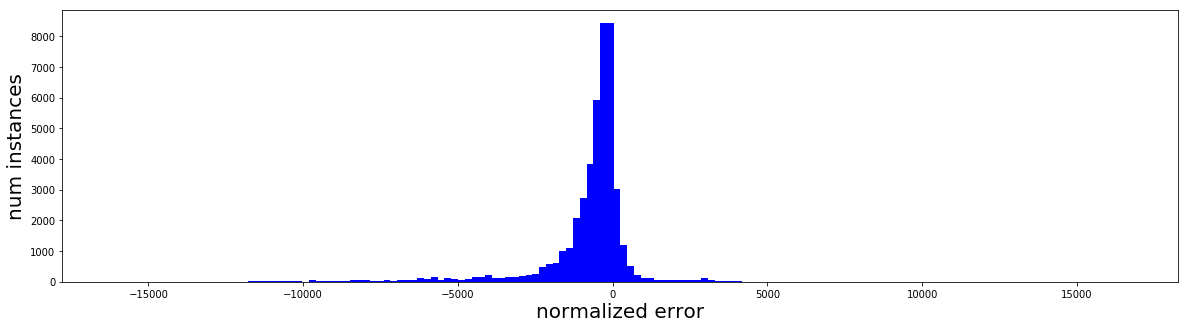

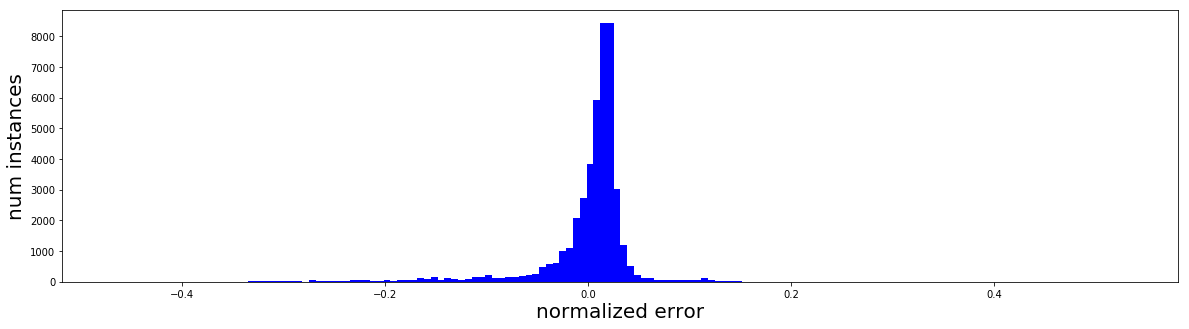

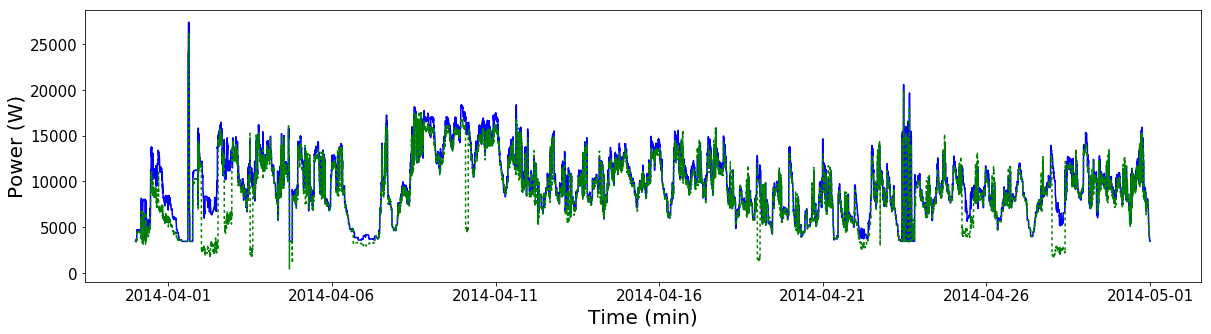

approximation accuracy: 0.7302775991730033


In [23]:
real['Total'] = real.iloc[:, -64:-1].sum(axis=1)
approx['Total'] = approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=all_time_interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [24]:
#all_time_interval_power_consumption_correction = all_time_interval_power_consumption.fillna(55.52)
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

### Plot an interval

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


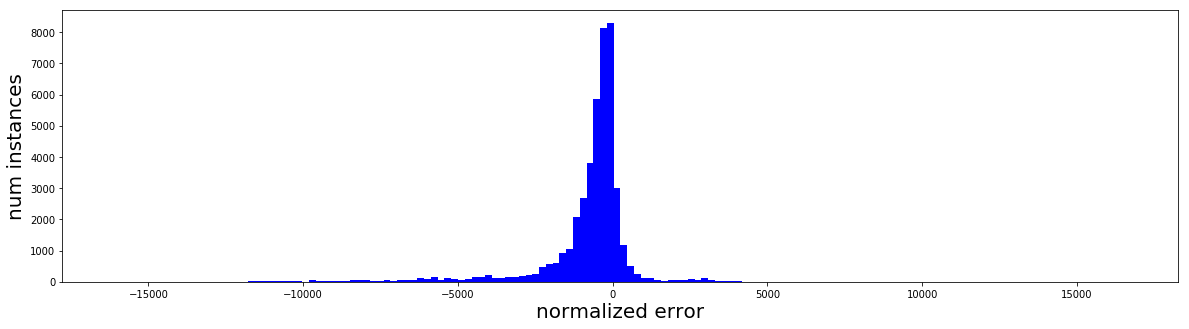

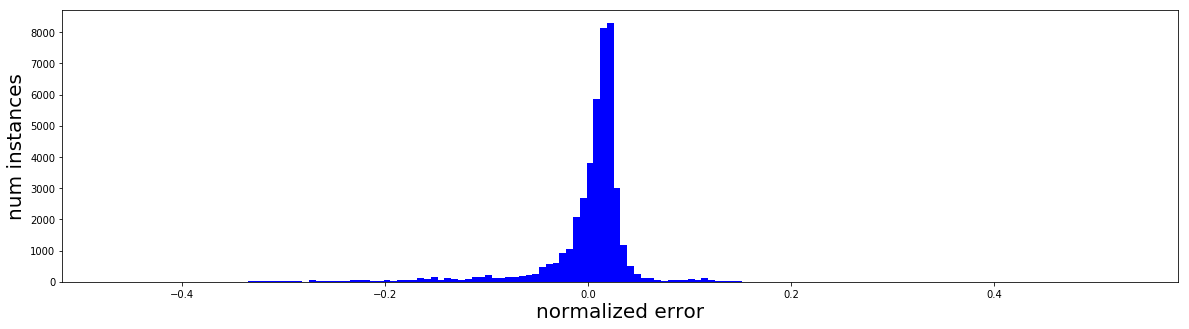

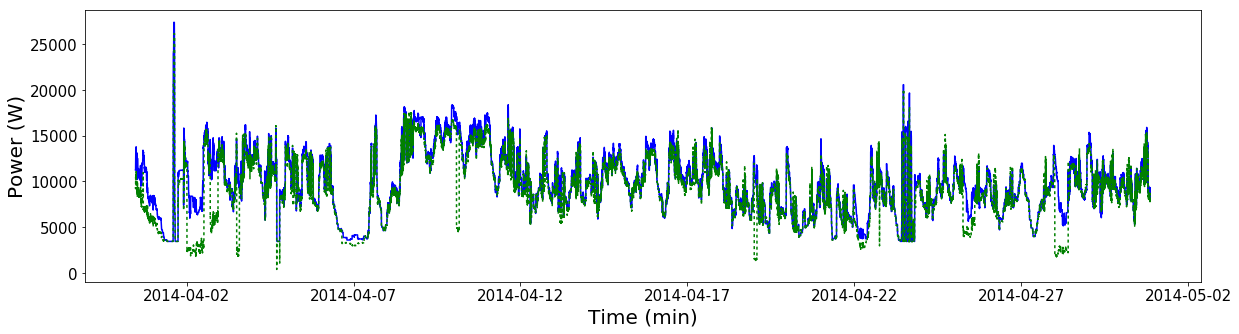

approximation accuracy: 0.7253417201710899


In [25]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-03-31 11:21:00')
interval_end_time = pd.to_datetime('2014-04-30 20:32:00')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']

plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=5)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

### three days accuracy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


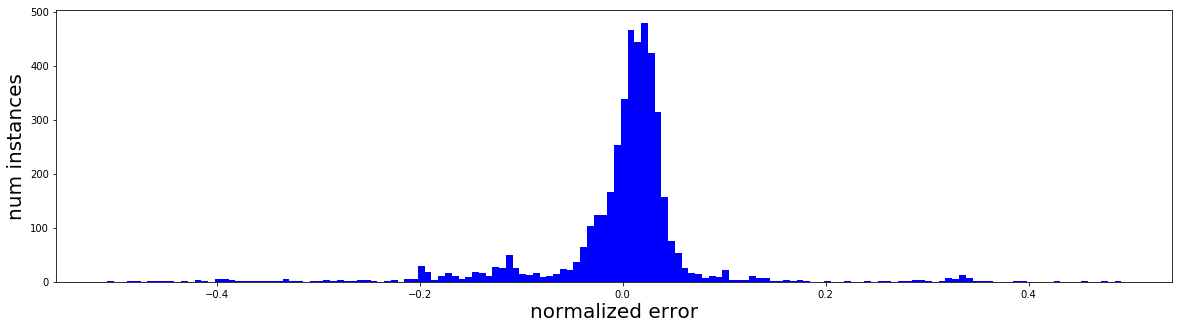

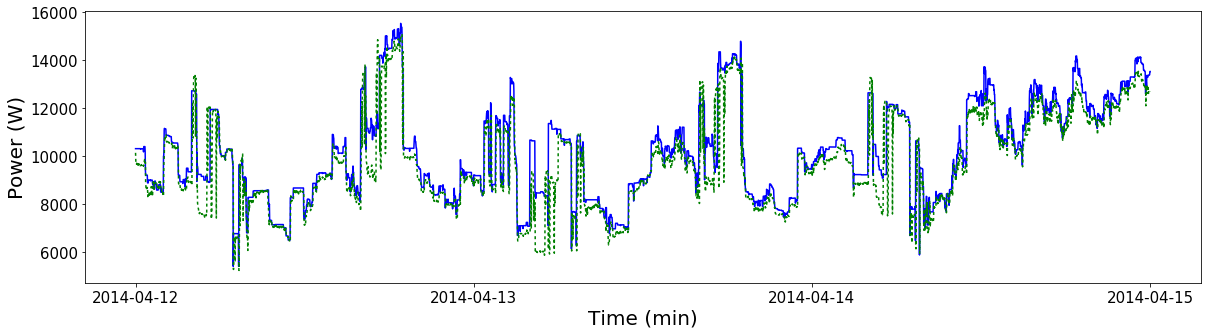

approximation accuracy: 0.772209155467761


In [32]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-12')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
#plot_hist(n_bins=150, data=differences)
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)

print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

In [27]:
datadir = "/datasets/eurora_data/db1/"
infile_nodes = datadir + "nodes.csv"

nodes = pd.read_csv(infile_nodes, index_col=0)

In [28]:
all_time_interval_power_consumption_correction = all_time_interval_power_consumption

for node_index, node_row in nodes.iterrows():
    node_id = node_row['node_id']
    core_idle = node_row['core_idle']
    idle_consumption = core_idle * 16
    if( int(node_id) < 10):
        node_id = "0" + str(node_id)
    else:
        node_id = str(node_id)
    # print(node_id)
    if (node_id != "43"):
        all_time_interval_power_consumption_correction[node_id + "_real"].fillna(idle_consumption, inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


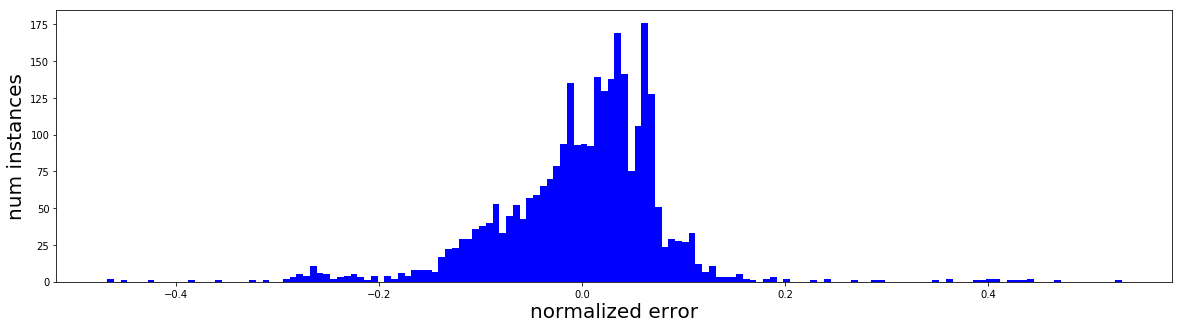

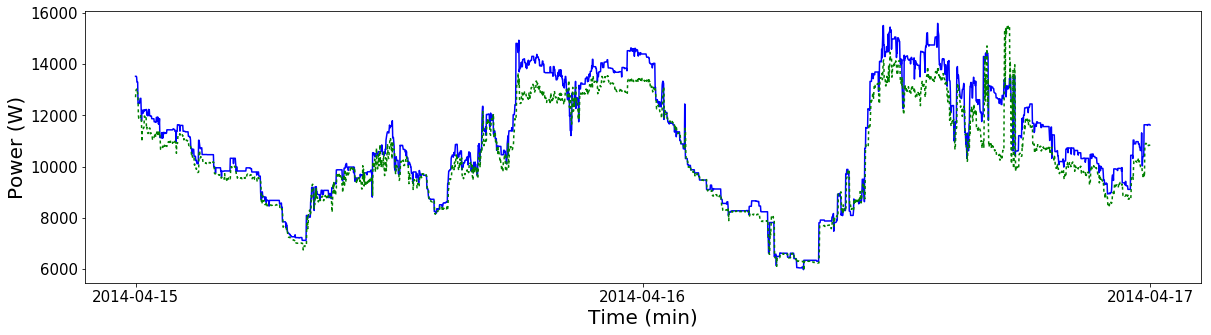

approximation accuracy: 0.8669367134419235


In [33]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-15')
interval_end_time = pd.to_datetime('2014-04-17')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


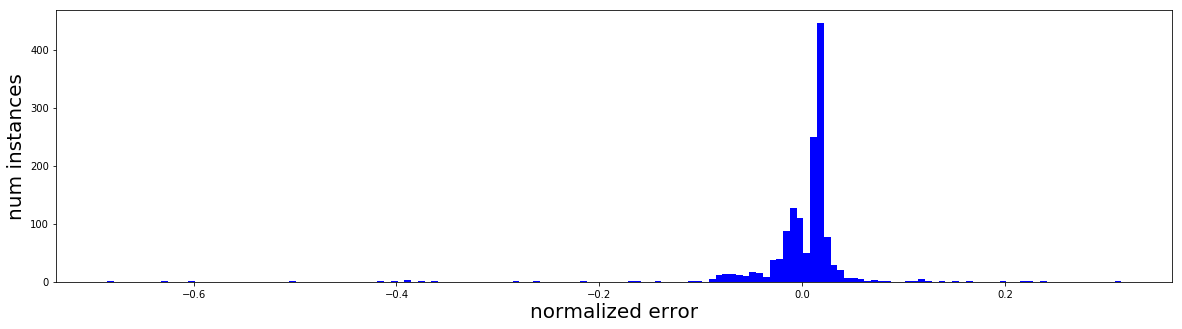

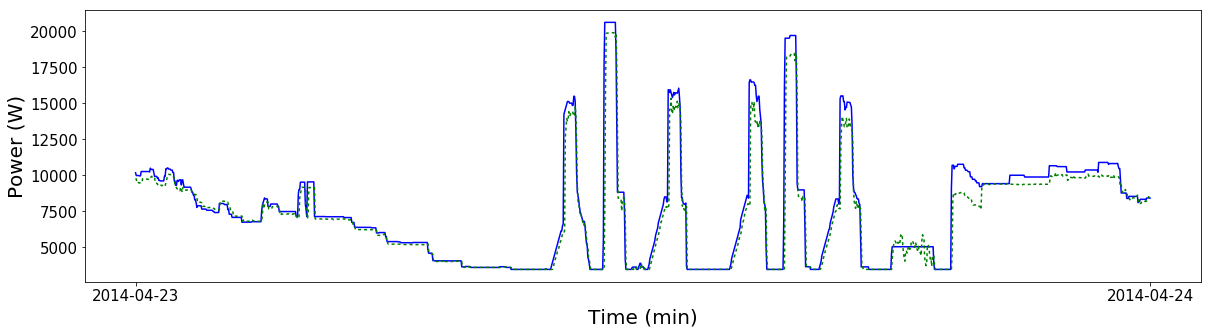

approximation accuracy: 0.8836475552507922


In [34]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-23')
interval_end_time = pd.to_datetime('2014-04-24')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences_norm)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

### old

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


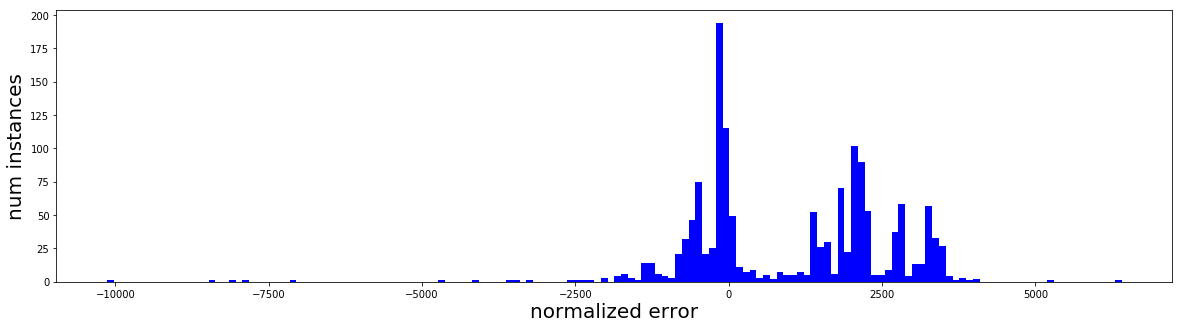

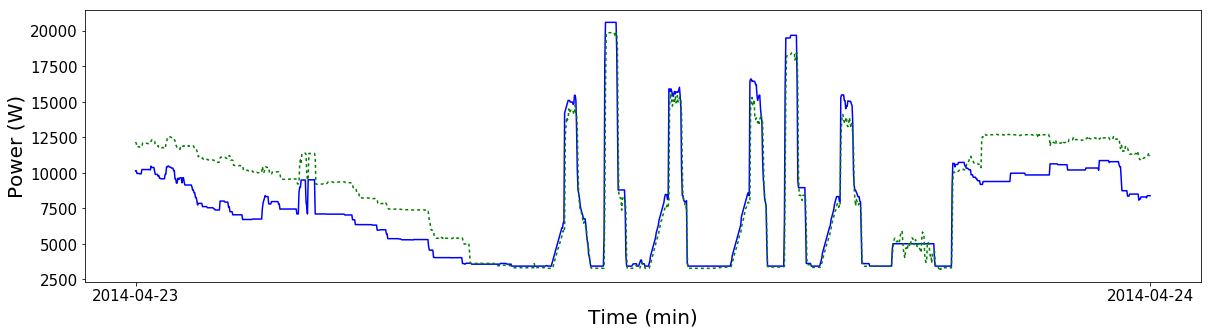

approximation accuracy: 0.7833870510335568


In [16]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-23')
interval_end_time = pd.to_datetime('2014-04-24')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


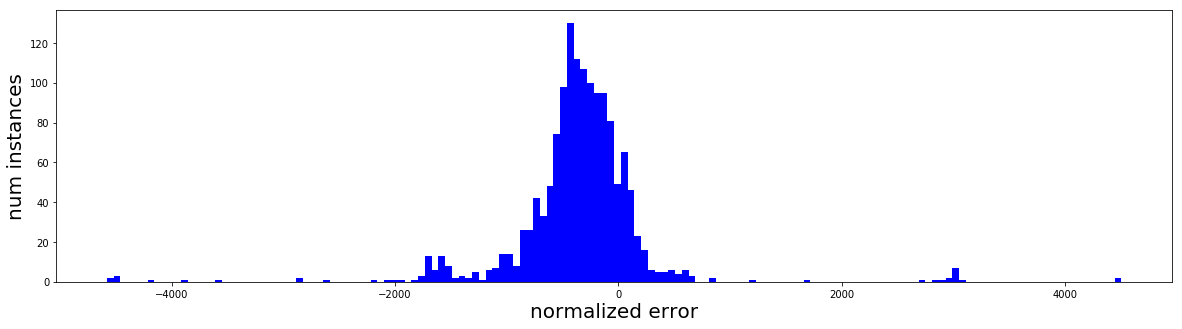

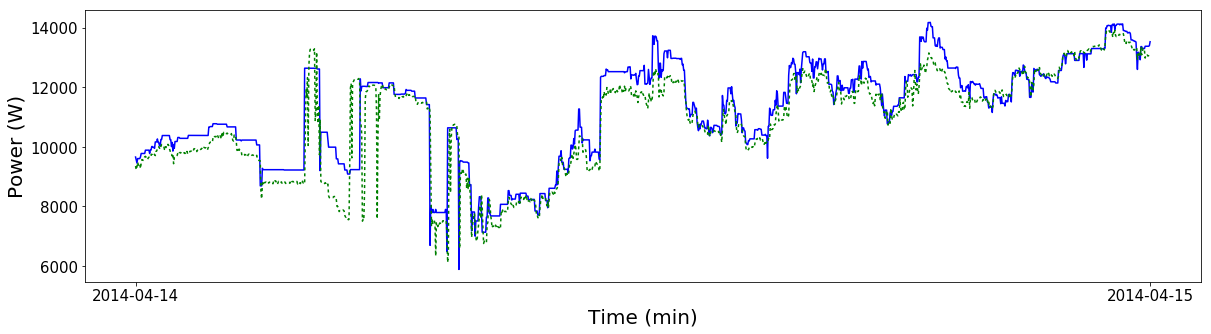

approximation accuracy: 0.8195475852330281


In [17]:
# Remove the head and the tail
interval_start_time = pd.to_datetime('2014-04-14')
interval_end_time = pd.to_datetime('2014-04-15')

interval_power_consumption = all_time_interval_power_consumption_correction[pd.to_datetime(all_time_interval_power_consumption_correction['timestamp']) >= interval_start_time]
interval_power_consumption = interval_power_consumption[pd.to_datetime(interval_power_consumption['timestamp']) <= interval_end_time]
real = interval_power_consumption.select(lambda col: col.endswith("real"), axis=1)
approx = interval_power_consumption.select(lambda col: col.endswith("approx"), axis=1)
real['Total']= real.iloc[:, -64:-1].sum(axis=1)
approx['Total']= approx.iloc[:, -64:-1].sum(axis=1)
differences = real['Total'] - approx['Total']
df = pd.DataFrame(differences)
df = df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
differences_norm = df['Total']
plot_hist(n_bins=150, data=differences)
plot_line(data_dates=interval_power_consumption, data_real=real['Total'], data_approx=approx['Total'], days_interval=1)
print("approximation accuracy: {}".format(r2_score(real['Total'], approx['Total'])))